# Usage example
This will become an usage example for loading and iterating equilibria.

In [1]:
# This file implements and tests recursion relations
import numpy as np
import timeit
import scipy.signal
from matplotlib import pyplot as plt
from numba import jit, njit, prange
from numba import complex128, int64    # import jit value types
from functools import lru_cache # import functools for caching
import warnings
warnings.simplefilter("ignore")

# for importing parsed codes
import sys
sys.path.insert(1,'/Users/lanke/Desktop/Second year project/Code/python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
from recursion_relations_full import *
import parsed
debug_path = '/Users/lanke/Desktop/Second year project/Code/test_data_eduardo/'

# Profiling
import cProfile
import pstats

Detected 16 CPU's. Setting n_jobs to #CPU/2.


Axis shape:


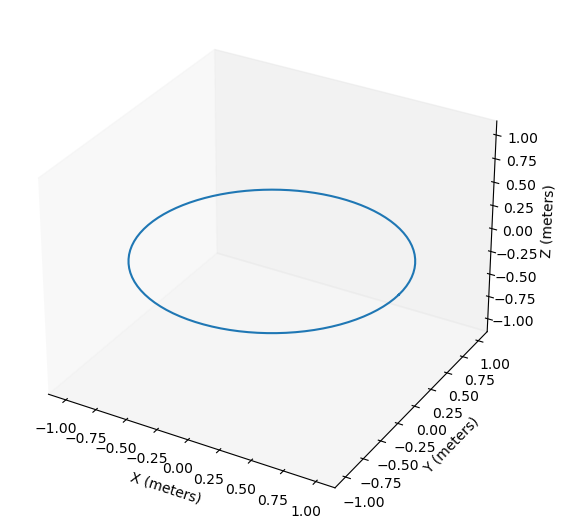

In [2]:
# No B theta
# The only case with non-trivial an-isotropic pressure
B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'circ/', 
        R_array=[2,0,1,2,0.0001,0],
        Z_array=[1,2,0,0.001]
    )
B_theta_coef_cp = B_theta_coef_cp.zero_append()

In [3]:
print('B_denom_coef_c', B_denom_coef_c.get_order())
print('B_alpha_coef', B_alpha_coef.get_order())
print('B_psi_coef', B_psi_coef_cp.get_order())
print('Y_coef_cp', Y_coef_cp.get_order())
print('p_perp_nm1', p_perp_coef_cp.get_order())
print('delta', Delta_coef_cp.get_order())

B_denom_coef_c 3
B_alpha_coef 1
B_psi_coef 1
Y_coef_cp 3
p_perp_nm1 2
delta 2


In [9]:


test_equilibrium = Equilibrium(X_coef_cp.mask(2),
    Y_coef_cp.mask(2),
    Z_coef_cp.mask(2),
    B_psi_coef_cp.mask(0),
    B_theta_coef_cp.mask(2),
    B_denom_coef_c.mask(2),
    B_alpha_coef.mask(1),
    kap_p, dl_p, tau_p,
    iota_coef.mask(0), eta,
    p_perp_coef_cp.mask(2),
    Delta_coef_cp.mask(2))

test_equilibrium = test_equilibrium.iterate_2_magnetic_only(
        n_eval=4,
        B_theta_nm1=0, B_theta_n=0,
        B_psi_nm20=0,
        B_alpha_nb2=0,
        B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
        Y_free_nm1=Y_coef_cp[3].get_Yn1s_Yn1c()[1], Y_free_n=0,
        p_perp_nm1=0, p_perp_n=0,
        Delta_nm1=0, Delta_n=0, filter=True)

test_equilibrium = test_equilibrium.iterate_2_magnetic_only(
        n_eval=6,
        B_theta_nm1=0, B_theta_n=0,
        B_psi_nm20=0,
        B_alpha_nb2=0,
        B_denom_nm1=0, B_denom_n=0,
        Y_free_nm1=0, Y_free_n=0,
        p_perp_nm1=0, p_perp_n=0,
        Delta_nm1=0, Delta_n=0, filter=True)

Evaluating order 3 4
n_eval 4
X_coef_cp 3
Y_coef_cp 3
Z_coef_cp 4
B_theta_coef_cp 4
B_psi_coef_cp 2
B_alpha_coef 2
B_denom_coef_c 4
iota_coef 1
B_psi_nm3
Time elapsed(s): 1.5864720344543457
X_coef_cp 4
B_psi_coef_cp 2
B_theta_coef_cp 4
Evaluating order 5 6
n_eval 6
X_coef_cp 5
Y_coef_cp 5
Z_coef_cp 6
B_theta_coef_cp 6
B_psi_coef_cp 4
B_alpha_coef 3
B_denom_coef_c 6
iota_coef 2
B_psi_nm3
Time elapsed(s): 4.9491987228393555
X_coef_cp 6
B_psi_coef_cp 4
B_theta_coef_cp 6


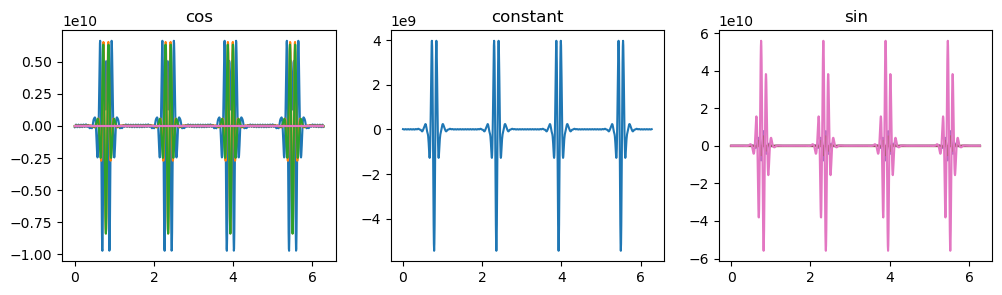

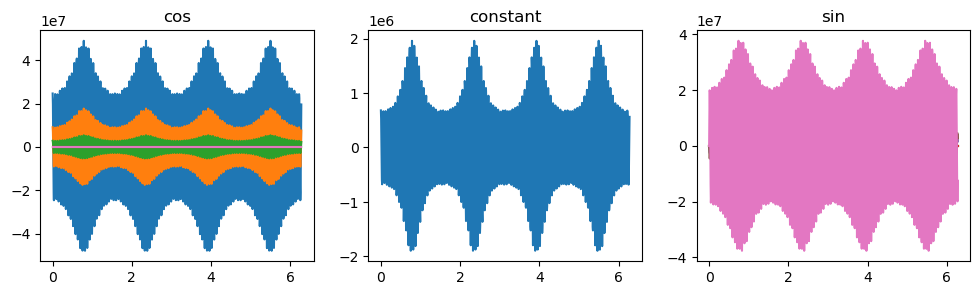

In [11]:
n=6
plt.rcParams['figure.figsize'] = [4,3]
# test_equilibrium.unknown['X_coef_cp'][n].get_spectrum().display_content(fourier_mode=False)
test_equilibrium.unknown['X_coef_cp'][n].display_content()
test_equilibrium.noise['filter']['X_coef_cp'][n].display_content()

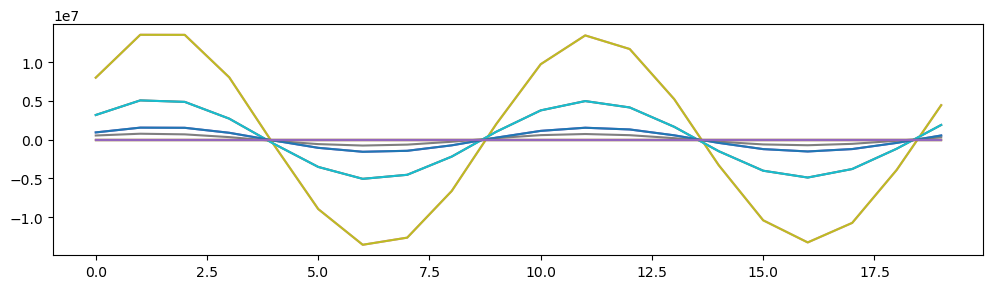

In [12]:
plt.plot(test_equilibrium.noise['filter']['X_coef_cp'][n].content.T[200:220,:])

In [ ]:
plt.rcParams['figure.figsize'] = [4,3]
for n in range(3,8):
    print('X',n)
    test_equilibrium.unknown['X_coef_cp'][n].display()

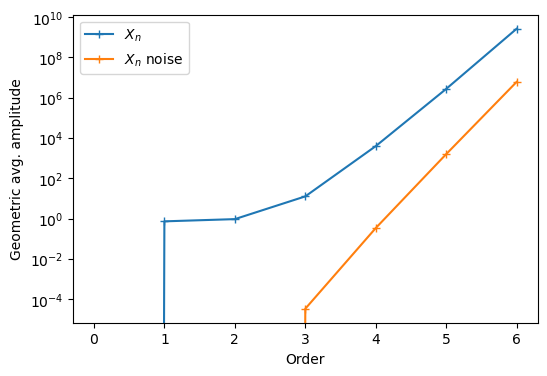

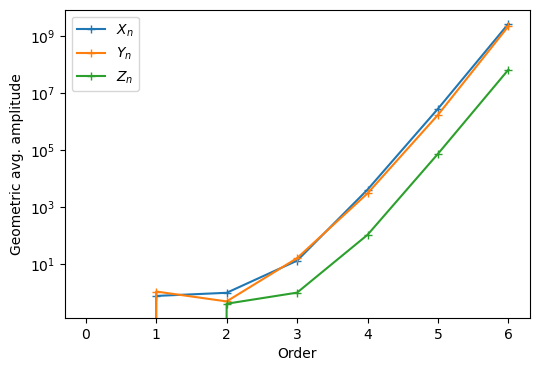

In [16]:
def chiphiepsfunc_to_amp_list(chiphiepsfunc_in):
    plot_list = []
    for element in chiphiepsfunc_in.chiphifunc_list:
        if np.isscalar(element):
            plot_list.append(element)
        else:
            avg_amplitude_sq = np.average(element.content*np.conjugate(element.content))
            plot_list.append(np.sqrt(avg_amplitude_sq))
    return(plot_list)

def plot_avg_amplitude(chiphiepsfunc_in, label):
    plt.rcParams['figure.figsize'] = [6,4]
    plot_list = chiphiepsfunc_to_amp_list(chiphiepsfunc_in)
    indices = range(len(plot_list))
    plt.plot(indices, plot_list, marker = '+', label = label)
    plt.xlabel('Order')
    plt.ylabel('Geometric avg. amplitude')
    plt.yscale('log')
    plt.legend()
    
    
plot_avg_amplitude(test_equilibrium.unknown['X_coef_cp'], '$X_n$')
plot_avg_amplitude(test_equilibrium.noise['filter']['X_coef_cp'], '$X_n$ noise')
plt.show()
plot_avg_amplitude(test_equilibrium.unknown['X_coef_cp'], '$X_n$')
plot_avg_amplitude(test_equilibrium.unknown['Y_coef_cp'], '$Y_n$')
plot_avg_amplitude(test_equilibrium.unknown['Z_coef_cp'], '$Z_n$')

# plot_avg_amplitude(test_equilibrium.B_psi_coef_cp, '$B_{\psi n}$')
# plt.show()

In [ ]:
test_equilibrium.noise['roll_avg']['X_coef_cp'][7].display_content()

In [ ]:
chiphifunc.backend = 'threading'
chiphifunc.n_job = 10

def iterate():
    test_equilibrium.iterate_2_magnetic_only(
        n_eval=5,
        B_theta_nm1=0, B_theta_n=0,
        B_psi_nm30=0,
        B_alpha_nm1d2=0,
        B_denom_nm1=0, B_denom_n=0,
        Y_free_nm1=0, Y_free_n=0,
        p_perp_nm1=0, p_perp_n=0,
        Delta_nm1=0, Delta_n=0)

profile = cProfile.Profile()
profile.runcall(
    iterate
)

ps = pstats.Stats(profile)


ps.sort_stats('tottime', 'ncalls') 
ps.print_stats()

In [ ]:
test_equilibrium = test_equilibrium.iterate_2_magnetic_only(
        B_theta_nm1=0, B_theta_n=0,
        B_psi_nm30=0,
        B_alpha_nm1d2=0,
        B_denom_nm1=0, B_denom_n=0,
        Y_free_nm1=0, Y_free_n=0,
        p_perp_nm1=0, p_perp_n=0,
        Delta_nm1=0, Delta_n=0)